<a href="https://colab.research.google.com/github/biplovgautam/aifoundationclass/blob/main/clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clustering algorithm
# k means clustrng
# it is the techinique to organize data into grouyps based on their similarity
# elbow method helps to find the centroid
# wcss


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.shape
print(df.shape)  # Check rows and columns
print(df.columns)  # Check actual column names


(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [13]:
df = df.iloc[:,[3,4]]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


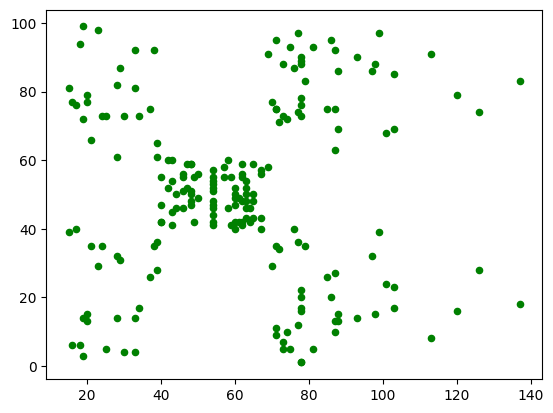

In [15]:
plt.scatter(df.iloc[:,0], df.iloc[:,1],s=20, c='green')

In [17]:
from sklearn.cluster import KMeans


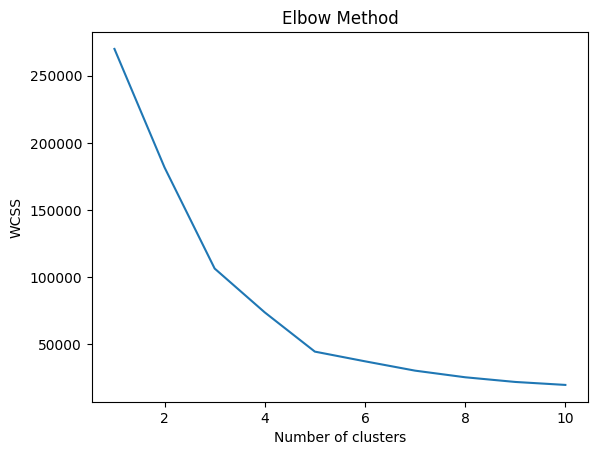

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++",
                   max_iter= 300, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init= "k-means++",
               max_iter= 300, n_init=10)
labels = kmeans.fit_predict(df)


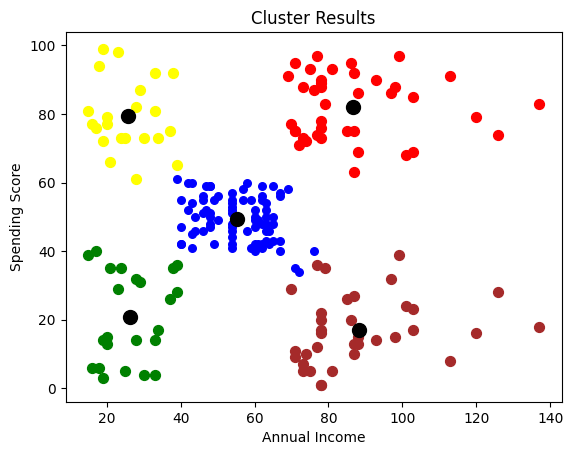

In [21]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], s=50, c= "red")
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], s=30, c= "blue")
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], s=50, c= "green")
plt.scatter(df.iloc[labels==3,0], df.iloc[labels==3,1], s=50, c= "yellow")
plt.scatter(df.iloc[labels==4,0], df.iloc[labels==4,1], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()